-------------------------

# $\textbf{CHAPTER 02}$ : NUM. LINEAR ALGEBRA.

--------------

In [45]:
#import some software
import numpy as np
from sympy import Matrix ,sympify, Symbol,factor ,eye ,zeros , gcd, lcm,diag,GramSchmidt, sympify, sqrt,simplify
import sympy as sp
from scipy.linalg import block_diag
from scipy.linalg import lu, block_diag
from sympy.matrices import GramSchmidt
from sympy import hessian as H
from sympy.abc import x,y

sp.init_printing() #Μετατροπή σε latex.


In [46]:
#Main Class

class Linear_Algebra_Matrices:
    
    def __init__(self,A):     # A : sympy.matrices.dense.MutableDenseMatrix type input.
        self.A = A
        
    def __repr__(self):
        return f'{self.A}'
    
    def __str__(self):
        return f'{self.A}'
    
    def __add__(self,other):
        return Linear_Algebra_Matrices(self.A + other.A)
    
    def __sub__(self,other):
        return Linear_Algebra_Matrices(self.A - other.A)
    
    def __mul__(self,other):
        return Linear_Algebra_Matrices(self.A @ other.A)
    
    def __rmul__(self,value):
        return Linear_Algebra_Matrices(value*self.A)
    
    def det(self):
        return self.A.det()
    
    def Jordan_form(self, Mat = None):
        P , J = self.A.jordan_form()
        if Mat == 'P' or Mat == 'not J' or Mat == False:
            return P
        else:
            return J
    
    def inv(self):
        try:
            return self.A.inv()
        except:
            return f"{self.A} isn't invertible , det=0."
    
    def Matrix(self):
        return self.A
    def M(self): return self.Matrix()
    def mat(self): return self.Matrix()
    
    def arr(self):
        return np.array(self.A) 

    def X(self):
        x=Symbol('x')
        if self.A.shape[0] == self.A.shape[1]:
            return factor((self.A-x*eye(self.A.shape[0])).det())
        else:
            return 'non defined'
        
    def char(self): return self.X()    
    def pol(self): return self.X()
    
    def dim_ker(self):
        if self.A.shape[0] == self.A.shape[1]:
            return self.A.shape[0] - self.A.rank()
        else:    return 'non defined'
        
    def mhdenodynamh(self):
        sigma = 1
        while (self.A**sigma)!=zeros(self.A.shape[0]):
            sigma+=1
        print( 'Μηδενοδύναμος με δείκτη','σ =',sigma )
    
    def mhdenodynamh_sigma(self):
        sigma = 1
        while (self.A**sigma)!=zeros(self.A.shape[0]):
            sigma+=1
        return sigma
    
    def eg_vals(self):
        return self.A.eigenvals()
    def EVA(self): return self.eg_vals()
    
    def eg_vecs(self):
        return self.A.eigenvects()
    def EVE(self): return self.eg_vecs()
    
    def is_diagon(self,domain = None):
        if domain == 'Real' or domain == True or domain == 'R':
            return self.A.is_diagonalizable(reals_only = True)
        else:
            return self.A.is_diagonalizable(reals_only = False)
        
    def gauss(self):
        pl,gauss = lu(self.A, permute_l=True)
        L=[]
        for i in range(len(gauss)):
            for j in range(len(gauss)):
                L.append(int(gauss[i][j]))
        ap_gauss= np.array(L).reshape(self.A.shape[0], -1)
        return Matrix(ap_gauss)
    
    def col_split(self):
        return list(map(Matrix,np.hsplit(np.array(Arr.Matrix()), np.array(Arr.Matrix()).shape[1])))
    def row_split(self):
        return list(map(Matrix,np.vsplit(np.array(Arr.Matrix()), np.array(Arr.Matrix()).shape[0])))
    
    def Gram_col(self,Type = None):
        if Type == True or Type == 'norm' or Type == 'normal' or Type == 'N':
            return GramSchmidt(self.col_split(),True)
        else:
            return GramSchmidt(self.col_split(),False)
        
    def Gram_row(self,Type = None):
        if Type == True or Type == 'norm' or Type == 'normal' or Type == 'N':
            return GramSchmidt(self.row_split(),True)
        else:
            return GramSchmidt(self.row_split(),False)
        
    def NS(self):
        return self.A.nullspace()
    def ker(self): return self.NS()
    def NS_T(self):
        return self.A.T.nullspace()
    def ker_T(self): return self.NS_T()
    def R(self):
        return self.A.columnspace()
    def R_T(self):
        return self.A.T.columnspace()
    def T(self):
        return self.A.T
    
    def minipoly(self, var='x'):
        _, jordan_cells = self.A.jordan_cells()
        ews = dict()
        for cell in jordan_cells:
            eigenvals = cell.eigenvals()
            found = False
            m = list(eigenvals.keys())[0]
            for k in ews:
                if k == m:
                    found = True
                    if ews[k] < eigenvals[k]:
                        ews.update(eigenvals)
                        print(True, k, ews[k], eigenvals[k])
                        break

            if not found:
                ews.update(eigenvals)
        poly_pur = list()
        for k, value in ews.items():
            if k == 0:
                tm = ''
            else:
                tm = '{}{}'.format('-' if k > 0 else '+', abs(k))
            poly_pur.append('({}{})^{}'.format(var, tm, value))

        return ' *'.join(poly_pur)

    def m(self):
        return factor(sympify(self.minipoly())) #from python--->%%latex
    def minimal(self): return self.m()
    def mpol(self): return self.m()
    def m_pol(self): return self.m()
    
    def gen_idioxwroi(self): #genikeymenos_idioxwros/oi,Generalized eigenvectors 
        L=[]
        for idiotimh,pol in self.A.eigenvals().items():
            if self.A.shape[0] == self.A.shape[1]:
                print('bar_V_A('+str(idiotimh)+') =')
                L.append( ((self.A-idiotimh*eye(self.A.shape[0]))**pol).nullspace() )
        return L
    def gen_eigenvec(self): return self.gen_idioxwroi()
    def g_eg_vecs(self): return self.gen_idioxwroi()
    def g_eg_space(self): return self.gen_idioxwroi()
    
    def di(self): #di for jordan_form
        D={}
        sigma = self.mhdenodynamh_sigma()
        for i in range(sigma+2):
            D['d'+str(i)]=len ((self.A**i).nullspace()) #di=dim(ker(A**i)).
        return D
    
    def ri(self): # rk=2d_k - d_{k+1} - d_{k-1}
        D={}
        sigma = self.mhdenodynamh_sigma()
        for k in range(1,sigma+1):
            D['r'+str(k)]=2*self.di()['d'+str(k)]-self.di()['d'+str(k+1)]-self.di()['d'+str(k-1)]#d_{sigam+1}=d_{sigma}
        return D
    def QR(self,Mat = None):
        Q, R = self.A.QRdecomposition()
        if Mat == 'R':
            return R
        else:
            return Q
    def LU(self, Mat = None):
        L, U, _ = self.A.LUdecomposition()
        if Mat == 'U':
            return U
        else:
            return L
        
        

In [47]:
#Example

A = Matrix([
        [1,1,-2,0,1,-1],
        [3,1,5,1,-1,3],
        [-2,-1,0,0,-1,0],
        [2,1,0,0,1,0],
        [-5,-3,-1,-1,-1,-1],
        [-3,-2,-1,-1,0,-1]
    ])

Arr =  Linear_Algebra_Matrices(A)

In [48]:
Arr.arr()

array([[1, 1, -2, 0, 1, -1],
       [3, 1, 5, 1, -1, 3],
       [-2, -1, 0, 0, -1, 0],
       [2, 1, 0, 0, 1, 0],
       [-5, -3, -1, -1, -1, -1],
       [-3, -2, -1, -1, 0, -1]], dtype=object)

In [49]:
Arr.Matrix()

⎡1   1   -2  0   1   -1⎤
⎢                      ⎥
⎢3   1   5   1   -1  3 ⎥
⎢                      ⎥
⎢-2  -1  0   0   -1  0 ⎥
⎢                      ⎥
⎢2   1   0   0   1   0 ⎥
⎢                      ⎥
⎢-5  -3  -1  -1  -1  -1⎥
⎢                      ⎥
⎣-3  -2  -1  -1  0   -1⎦

In [7]:
Arr.det()

In [8]:
Arr.gauss()

⎡-5  -3  -1  -1  -1  -1⎤
⎢                      ⎥
⎢0   0   4   0   -1  2 ⎥
⎢                      ⎥
⎢0   0   1   0   -1  1 ⎥
⎢                      ⎥
⎢0   0   0   0   0   0 ⎥
⎢                      ⎥
⎢0   0   0   0   0   0 ⎥
⎢                      ⎥
⎣0   0   0   0   0   0 ⎦

In [9]:
#Arr.mhdenodynamh()

In [10]:
Arr.X()

In [11]:
#Arr.m()

In [54]:
Arr.eg_vecs()[0][2]

⎡⎡2/3 ⎤  ⎡-4/3⎤  ⎡1/3 ⎤⎤
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎢⎢-4/3⎥  ⎢5/3 ⎥  ⎢-2/3⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎢⎢-1/3⎥  ⎢2/3 ⎥  ⎢-2/3⎥⎥
⎢⎢    ⎥, ⎢    ⎥, ⎢    ⎥⎥
⎢⎢ 1  ⎥  ⎢ 0  ⎥  ⎢ 0  ⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎢⎢ 0  ⎥  ⎢ 1  ⎥  ⎢ 0  ⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎣⎣ 0  ⎦  ⎣ 0  ⎦  ⎣ 1  ⎦⎦

In [55]:
Arr.eg_vals()

In [56]:
Arr.Jordan_form()

⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  0  1  0  0  0⎥
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎢0  0  0  0  1  0⎥
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎣0  0  0  0  0  0⎦

In [15]:
Arr.di()

{'d0': 0, 'd1': 3, 'd2': 5, 'd3': 6, 'd4': 6}

In [16]:
Arr.ri()

{'r1': 1, 'r2': 1, 'r3': 1}

In [59]:
Arr.g_eg_space()[0]

bar_V_A(0) =


⎡⎡1⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤  ⎡0⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢1⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢1⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢1⎥  ⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢0⎥  ⎢1⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣0⎦  ⎣0⎦  ⎣0⎦  ⎣0⎦  ⎣0⎦  ⎣1⎦⎦

In [18]:
Arr.R()

⎡⎡1 ⎤  ⎡1 ⎤  ⎡-2⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢3 ⎥  ⎢1 ⎥  ⎢5 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-2⎥  ⎢-1⎥  ⎢0 ⎥⎥
⎢⎢  ⎥, ⎢  ⎥, ⎢  ⎥⎥
⎢⎢2 ⎥  ⎢1 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-5⎥  ⎢-3⎥  ⎢-1⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣-3⎦  ⎣-2⎦  ⎣-1⎦⎦

In [19]:
Arr.R_T()

⎡⎡1 ⎤  ⎡3 ⎤  ⎡-2⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢1 ⎥  ⎢-1⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-2⎥  ⎢5 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥, ⎢  ⎥, ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢1 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢-1⎥  ⎢-1⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣-1⎦  ⎣3 ⎦  ⎣0 ⎦⎦

In [20]:
Arr.ker()

⎡⎡2/3 ⎤  ⎡-4/3⎤  ⎡1/3 ⎤⎤
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎢⎢-4/3⎥  ⎢5/3 ⎥  ⎢-2/3⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎢⎢-1/3⎥  ⎢2/3 ⎥  ⎢-2/3⎥⎥
⎢⎢    ⎥, ⎢    ⎥, ⎢    ⎥⎥
⎢⎢ 1  ⎥  ⎢ 0  ⎥  ⎢ 0  ⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎢⎢ 0  ⎥  ⎢ 1  ⎥  ⎢ 0  ⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎣⎣ 0  ⎦  ⎣ 0  ⎦  ⎣ 1  ⎦⎦

In [21]:
Arr.col_split()

⎡⎡1 ⎤  ⎡1 ⎤  ⎡-2⎤  ⎡0 ⎤  ⎡1 ⎤  ⎡-1⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢3 ⎥  ⎢1 ⎥  ⎢5 ⎥  ⎢1 ⎥  ⎢-1⎥  ⎢3 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-2⎥  ⎢-1⎥  ⎢0 ⎥  ⎢0 ⎥  ⎢-1⎥  ⎢0 ⎥⎥
⎢⎢  ⎥, ⎢  ⎥, ⎢  ⎥, ⎢  ⎥, ⎢  ⎥, ⎢  ⎥⎥
⎢⎢2 ⎥  ⎢1 ⎥  ⎢0 ⎥  ⎢0 ⎥  ⎢1 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-5⎥  ⎢-3⎥  ⎢-1⎥  ⎢-1⎥  ⎢-1⎥  ⎢-1⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣-3⎦  ⎣-2⎦  ⎣-1⎦  ⎣-1⎦  ⎣0 ⎦  ⎣-1⎦⎦

In [22]:
Arr.QR()

⎡  √13     23⋅√559   -3⋅√301  ⎤
⎢  ───     ───────   ──────── ⎥
⎢   26       1118      301    ⎥
⎢                             ⎥
⎢ 3⋅√13   -35⋅√559    11⋅√301 ⎥
⎢ ─────   ─────────   ─────── ⎥
⎢   26       1118       602   ⎥
⎢                             ⎥
⎢ -√13     3⋅√559     19⋅√301 ⎥
⎢ ─────    ──────     ─────── ⎥
⎢   13      559         602   ⎥
⎢                             ⎥
⎢  √13    -3⋅√559    -19⋅√301 ⎥
⎢  ───    ────────   ─────────⎥
⎢   13      559         602   ⎥
⎢                             ⎥
⎢-5⋅√13   -11⋅√559     √301   ⎥
⎢───────  ─────────    ────   ⎥
⎢   26       1118      602    ⎥
⎢                             ⎥
⎢-3⋅√13   -17⋅√559   -9⋅√301  ⎥
⎢───────  ─────────  ──────── ⎥
⎣   26       1118      301    ⎦

In [23]:
Arr.QR('R')

⎡       29⋅√13    21⋅√13     11⋅√13    7⋅√13      8⋅√13  ⎤
⎢2⋅√13  ──────    ──────     ──────    ─────      ─────  ⎥
⎢         26        26         26        26         13   ⎥
⎢                                                        ⎥
⎢        √559   -193⋅√559   -7⋅√559   57⋅√559   -50⋅√559 ⎥
⎢  0     ────   ──────────  ────────  ───────   ─────────⎥
⎢         26       1118       1118      1118       559   ⎥
⎢                                                        ⎥
⎢                 6⋅√301     2⋅√301   -4⋅√301    4⋅√301  ⎥
⎢  0      0       ──────     ──────   ────────   ──────  ⎥
⎣                   43         43        43        43    ⎦

In [24]:
Arr.QR()@Arr.QR('R') == Arr.Matrix() # QR = A

True

In [25]:
Arr.is_diagon() # domain = C

False

In [26]:
Arr.is_diagon(domain = 'R')

False

In [27]:
Arr.Jordan_form('P')

⎡6   1   1  -5/2  -1/2  2/3 ⎤
⎢                           ⎥
⎢-6  3   0  7/2    0    -4/3⎥
⎢                           ⎥
⎢0   -2  0   1     1    -1/3⎥
⎢                           ⎥
⎢0   2   0   -1    0     1  ⎥
⎢                           ⎥
⎢-6  -5  0  3/2    0     0  ⎥
⎢                           ⎥
⎣-6  -3  0  1/2    0     0  ⎦

In [28]:
Arr.Jordan_form('P').inv()@Arr.Matrix()@Arr.Jordan_form('P') == Arr.Jordan_form() # P^-1  * A * P = J

True

In [29]:
f = x**2 - x*y + y**2 +2*x + 2*y - 4
xy_vec = Matrix([
                x,
                y
                ]) 
xy_vec

⎡x⎤
⎢ ⎥
⎣y⎦

In [30]:
hessianf = simplify(H(f,xy_vec))
hessianf

⎡2   -1⎤
⎢      ⎥
⎣-1  2 ⎦

In [31]:
arr = Matrix([
    [1,-2,-2],
    [1,0,0],
    [0,1,0]
])
A = Linear_Algebra_Matrices(arr)

P, D = arr.diagonalize()
P

⎡                                                                             
⎢3 ___ ⎛      3 ___            ⎛    3 ___            3 __________⎞ 3 _________
⎢╲╱ 5 ⋅⎝-20 + ╲╱ 5 ⋅(1 + √3⋅ⅈ)⋅⎝2 + ╲╱ 5 ⋅(1 + √3⋅ⅈ)⋅╲╱ 7 + 3⋅√6 ⎠⋅╲╱ 7 + 3⋅√6
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                       2           2/3                       
⎢                         180⋅(1 + √3⋅ⅈ) ⋅(7 + 3⋅√6)                          
⎢                                                                             
⎢          ⎛                 ⎛               3 ____________⎞ 3 ____________⎞  
⎢      2/3 ⎜  2   (1 + √3⋅ⅈ)⋅⎝2 + (1 + √3⋅ⅈ)⋅╲╱ 35 + 15⋅√6 ⎠⋅╲╱ 35 + 15⋅√6 ⎟  
⎢     5   ⋅⎜- ─ + ─────────────────────────────────────────────────────────⎟  
⎢          ⎝  3                               30                           ⎠  
⎢     ──────────────────────────────────────────────────────────────────────  
⎢                                       3 __________

In [32]:
B = Matrix([
    [2,2,-1],
    [1,0,0],
    [0,1,0]
])
P, D = B.diagonalize()
P@D

⎡    ⎛3   √5⎞ ⎛7   3⋅√5⎞  ⎛√5   3⎞ ⎛3⋅√5   7⎞⎤
⎢-1  ⎜─ - ──⎟⋅⎜─ - ────⎟  ⎜── + ─⎟⋅⎜──── + ─⎟⎥
⎢    ⎝2   2 ⎠ ⎝2    2  ⎠  ⎝2    2⎠ ⎝ 2     2⎠⎥
⎢                                            ⎥
⎢                 2                    2     ⎥
⎢         ⎛3   √5⎞             ⎛√5   3⎞      ⎥
⎢1        ⎜─ - ──⎟             ⎜── + ─⎟      ⎥
⎢         ⎝2   2 ⎠             ⎝2    2⎠      ⎥
⎢                                            ⎥
⎢          3   √5               √5   3       ⎥
⎢-1        ─ - ──               ── + ─       ⎥
⎣          2   2                2    2       ⎦

In [33]:
P

⎡    7   3⋅√5  3⋅√5   7⎤
⎢1   ─ - ────  ──── + ─⎥
⎢    2    2     2     2⎥
⎢                      ⎥
⎢     3   √5    √5   3 ⎥
⎢-1   ─ - ──    ── + ─ ⎥
⎢     2   2     2    2 ⎥
⎢                      ⎥
⎣1      1         1    ⎦

In [60]:
l2 = Symbol('λ_2')

l1 = Symbol('λ_1')
l0 = Symbol('λ_0')
n = Symbol('n')
pp = Matrix([
    [1,3*l1-1,3*l2-1],
    [-1,l1,l2],
    [1,1,1]
])
#pp

In [35]:
P

⎡    7   3⋅√5  3⋅√5   7⎤
⎢1   ─ - ────  ──── + ─⎥
⎢    2    2     2     2⎥
⎢                      ⎥
⎢     3   √5    √5   3 ⎥
⎢-1   ─ - ──    ── + ─ ⎥
⎢     2   2     2    2 ⎥
⎢                      ⎥
⎣1      1         1    ⎦

In [61]:
dd = Matrix([
    [l0**n,0,0],
    [0,l1**n,0],
    [0,0,l2**n]
])
#dd

In [37]:
print(sp.latex(pp@dd)) #latex form

\left[\begin{matrix}λ_{0}^{n} & λ_{1}^{n} \left(3 λ_{1} - 1\right) & λ_{2}^{n} \left(3 λ_{2} - 1\right)\\- λ_{0}^{n} & λ_{1} λ_{1}^{n} & λ_{2} λ_{2}^{n}\\λ_{0}^{n} & λ_{1}^{n} & λ_{2}^{n}\end{matrix}\right]


In [62]:
#(pp@dd@pp.inv()@Matrix([1,1,1]))

In [39]:
P@D@P.inv()@Matrix([1,1,1])

⎡                                         ⎛3   √5⎞ ⎛7   3⋅√5⎞             ⎛3  
⎢                               (-3 + √5)⋅⎜─ - ──⎟⋅⎜─ - ────⎟   (-1 + √5)⋅⎜─ -
⎢⎛2   √5⎞ ⎛√5   3⎞ ⎛3⋅√5   7⎞             ⎝2   2 ⎠ ⎝2    2  ⎠             ⎝2  
⎢⎜─ - ──⎟⋅⎜── + ─⎟⋅⎜──── + ─⎟ + ───────────────────────────── + ──────────────
⎢⎝5   5 ⎠ ⎝2    2⎠ ⎝ 2     2⎠            -20 + 10⋅√5                     -20 +
⎢                                                                             
⎢                                                                         2   
⎢                                                                 ⎛3   √5⎞    
⎢                                               2       (-3 + √5)⋅⎜─ - ──⎟    
⎢                              ⎛2   √5⎞ ⎛√5   3⎞    1             ⎝2   2 ⎠    
⎢                              ⎜─ - ──⎟⋅⎜── + ─⎟  - ─ + ─────────────────── + 
⎢                              ⎝5   5 ⎠ ⎝2    2⎠    5       -20 + 10⋅√5       
⎢                                                   

In [63]:
#(P@dd@P.inv()@Matrix([1,1,1])).row(-1)

In [41]:
D

⎡-1    0       0   ⎤
⎢                  ⎥
⎢    3   √5        ⎥
⎢0   ─ - ──    0   ⎥
⎢    2   2         ⎥
⎢                  ⎥
⎢            √5   3⎥
⎢0     0     ── + ─⎥
⎣            2    2⎦

In [42]:
lp = P.inv()@Matrix([1,1,1])
lp

⎡                 -1/5                 ⎤
⎢                                      ⎥
⎢  -3 + √5       -1 + √5         5     ⎥
⎢─────────── + ─────────── - ──────────⎥
⎢-20 + 10⋅√5   -20 + 10⋅√5   50 - 25⋅√5⎥
⎢                                      ⎥
⎢                3   √5                ⎥
⎢                ─ - ──                ⎥
⎣                5   5                 ⎦

In [43]:
help(Arr)

Help on Linear_Algebra_Matrices in module __main__ object:

class Linear_Algebra_Matrices(builtins.object)
 |  Linear_Algebra_Matrices(A)
 |  
 |  Methods defined here:
 |  
 |  EVA(self)
 |  
 |  EVE(self)
 |  
 |  Gram_col(self, Type=None)
 |  
 |  Gram_row(self, Type=None)
 |  
 |  Jordan_form(self, Mat=None)
 |  
 |  LU(self, Mat=None)
 |  
 |  M(self)
 |  
 |  Matrix(self)
 |  
 |  NS(self)
 |  
 |  NS_T(self)
 |  
 |  QR(self, Mat=None)
 |  
 |  R(self)
 |  
 |  R_T(self)
 |  
 |  T(self)
 |  
 |  X(self)
 |  
 |  __add__(self, other)
 |  
 |  __init__(self, A)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __mul__(self, other)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __rmul__(self, value)
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  __sub__(self, other)
 |  
 |  arr(self)
 |  
 |  char(self)
 |  
 |  col_split(self)
 |  
 |  det(self)
 |  
 |  di(self)
 |  
 |  dim_ker(self)
 |  
 |  eg_vals(self)
 |  
 |  eg_vecs(

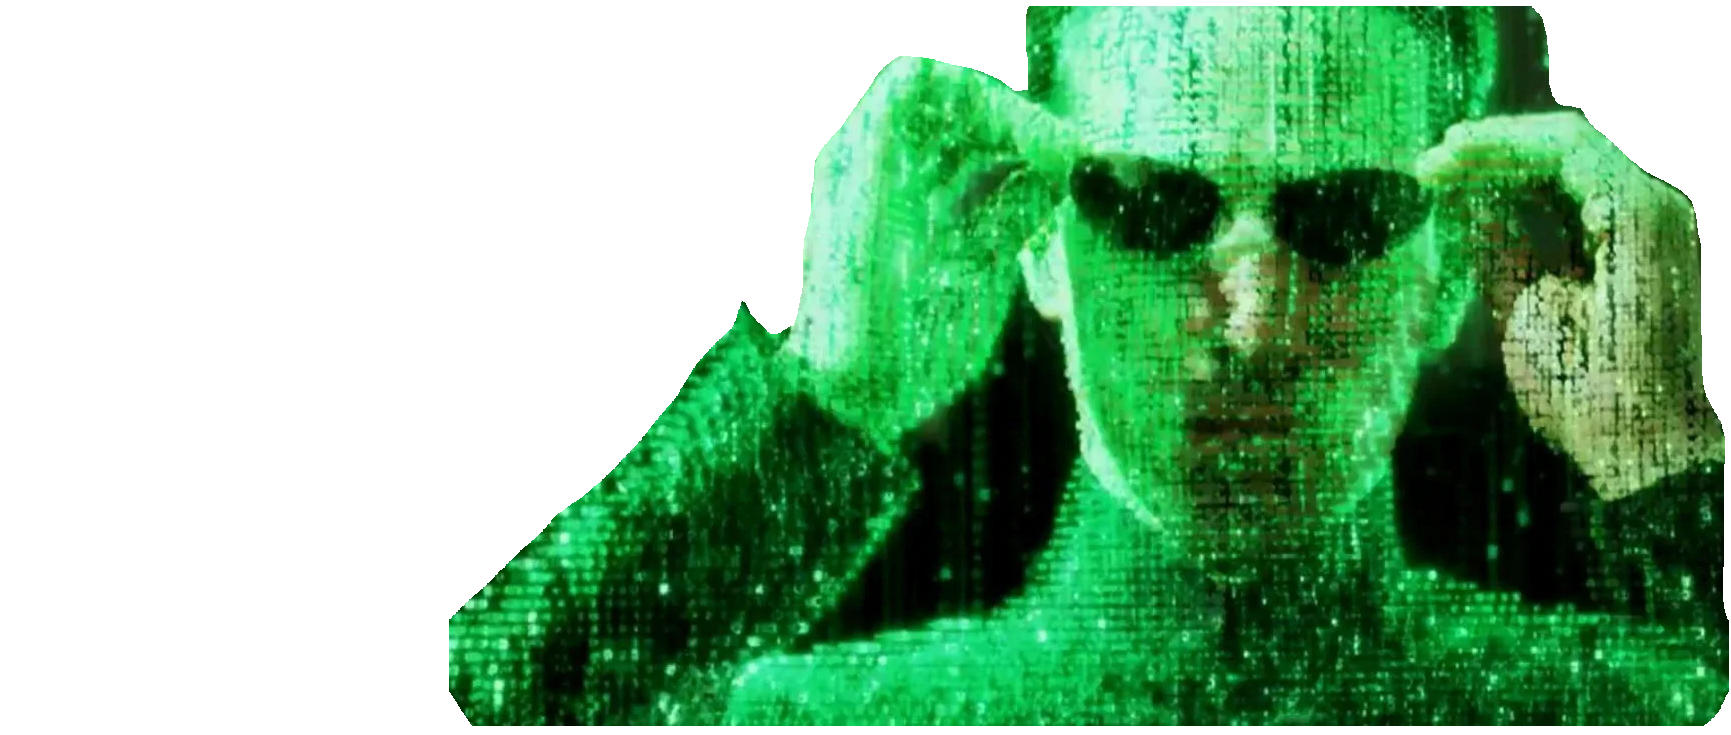